### Problem Statement
We need to find the rating of an app so that the companies can earn more profit

### Data Collection

In [2]:
## importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,confusion_matrix

from sklearn.linear_model import Ridge,Lasso,ElasticNet 

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor

In [3]:
df=pd.read_csv("C:\\Users\\shrut\\Downloads\\googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6357,BK Chat,COMMUNICATION,NaN,6,31M,"1,000+",Free,0,Teen,Communication,"July 30, 2018",2.1,4.1 and up
3341,Keypad Lock Screen,TOOLS,4.2,428581,4.7M,"10,000,000+",Free,0,Everyone,Tools,"July 17, 2018",1.33,4.0 and up
2098,Extreme Racing 2 - Real driving RC cars game!,FAMILY,4.3,4207,93M,"500,000+",Free,0,Everyone,Racing;Action & Adventure,"August 31, 2017",1.1.9,4.1 and up
5633,7 Nights at Pixel Pizzeria - 2,GAME,4.0,23168,54M,"1,000,000+",Free,0,Teen,Adventure,"July 9, 2018",1.3.0,4.4 and up
9881,Eurostat Country Profiles,PRODUCTIVITY,3.7,87,2.0M,"10,000+",Free,0,Everyone,Productivity,"April 12, 2018",37.0,4.0.3 and up
3540,Notepad,PRODUCTIVITY,4.2,80581,2.5M,"10,000,000+",Free,0,Everyone,Productivity,"October 16, 2016",2.4,2.3 and up
3468,Archos File Manager,PRODUCTIVITY,4.0,2131,2.3M,"5,000,000+",Free,0,Everyone,Productivity,"April 22, 2016",4.1.4,4.1 and up
2360,Dexcom G6,MEDICAL,3.0,45,20M,"5,000+",Free,0,Everyone,Medical,"July 16, 2018",1.2.3.2,6.0 and up
6641,Add-On: bq (b),PRODUCTIVITY,NaN,9,1.2M,"1,000+",Free,0,Everyone,Productivity,"May 19, 2015",10.0.3086,4.0 and up
8099,Doctor Finder CY,MEDICAL,4.9,57,6.1M,"1,000+",Free,0,Everyone,Medical,"November 11, 2015",1.7,3.0 and up


In [5]:
df.shape

(10841, 13)

In [6]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [8]:
df_copy=df.copy()

### Data Preprocessing

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [12]:
df.shape

(9360, 13)

In [13]:
df.nunique()

App               8190
Category            33
Rating              39
Reviews           5990
Size               413
Installs            19
Type                 2
Price               73
Content Rating       6
Genres             115
Last Updated      1299
Current Ver       2638
Android Ver         31
dtype: int64

We observed that number of unique apps is 8190 while total number of rows is 9360. This means there are duplicate rows or duplicate apps prensent in the data.

In [14]:
df.duplicated().sum()

474

In [15]:
duplicated_rows=df[df.duplicated()]
duplicated_rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

### EDA

In [18]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [19]:
df.shape

(8886, 13)

C:\Users\shrut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rating', ylabel='Density'>

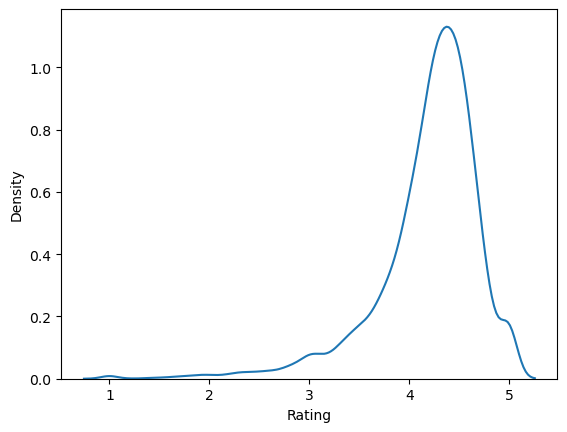

In [20]:
sns.kdeplot(df['Rating'])

The ratings are concentrated in the range of 3.5 to 4.5 out of 5. It is a left skewed plot

In [21]:
df['Rating'].max()

5.0

<Axes: >

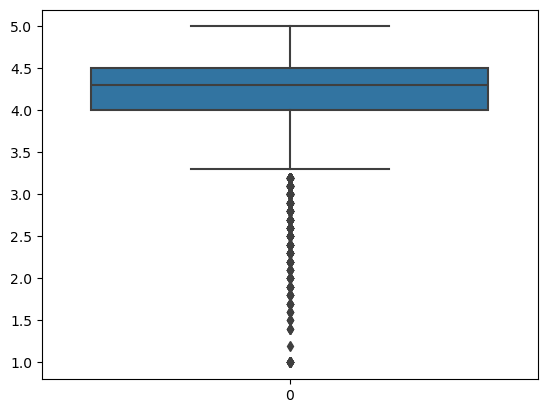

In [22]:
sns.boxplot(df['Rating'])

In [23]:
# from scipy.stats import percentileofscore

# # Replace 'datapoint' with your specific value
# datapoint = 3.2
# quantile = percentileofscore(df['Rating'], datapoint) / 100  # Convert percentile to quantile
# print(f"The quantile for {datapoint} is approximately {quantile:.2f}")

In [24]:
print(df['Category'].nunique())
print(df['Category'].unique())

33
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [25]:
rename_dict={'ART_AND_DESIGN': 'Art',
             'AUTO_AND_VEHICLES': 'Transport',
             'BEAUTY': 'Beauty',
             'BOOKS_AND_REFERENCE': 'Education',  # Combine with education
             'BUSINESS': 'Business',
             'COMICS': 'Comics',  # Combine with books
             'COMMUNICATION': 'Media', # rename media
             'NEWS_AND_MAGAZINES': 'Media', # Combine in media
             'GAME': 'Game',
             'VIDEO_PLAYERS': 'Game', # Combine with game
             'SOCIAL': 'Social',
             'DATING': 'Social', # social
             'EVENTS': 'Social', #social
             'EDUCATION': 'Education',
             'ENTERTAINMENT': 'Entertainment',
             'FINANCE': 'Finance',
             'FOOD_AND_DRINK': 'Eatables',
             'HEALTH_AND_FITNESS': 'Health',
             'HOUSE_AND_HOME': 'House',
             'LIBRARIES_AND_DEMO': 'Libraries',
             'LIFESTYLE': 'Lifestyle',
             'FAMILY': 'Family',
             'MEDICAL': 'Medical',
             'SHOPPING': 'Shopping',
             'PHOTOGRAPHY': 'Photos',
             'SPORTS': 'Sports',
             'TRAVEL_AND_LOCAL': 'Travel',
             'TOOLS': 'Tools',
             'PERSONALIZATION': 'Lifestyle',  # Combine with lifestyle
             'PRODUCTIVITY': 'Productivity',
             'PARENTING': 'Parenting',
             'WEATHER': 'Weather',
             'MAPS_AND_NAVIGATION': 'Maps'
            }

In [26]:
df['Category']=df['Category'].replace(rename_dict)

Text(0.5, 1.0, 'Countplot of Category')

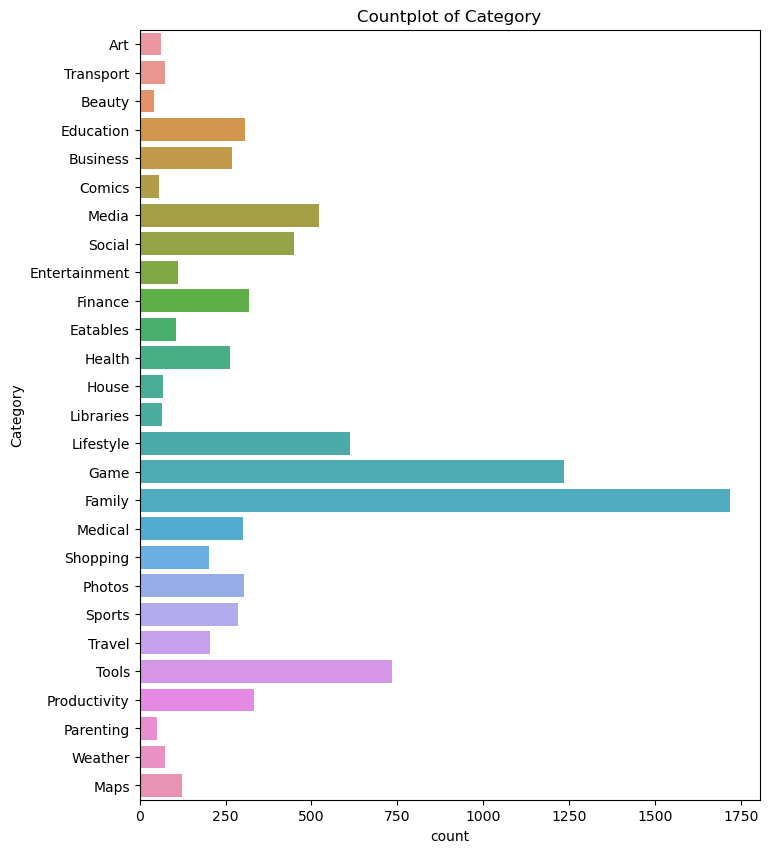

In [27]:
plt.figure(figsize=(8,10))
sns.countplot(y='Category',data=df)
plt.title('Countplot of Category')

Top categories are Family, followed by Game and Tools

In [28]:
counts=df['Category'].value_counts()

In [31]:
# Find categories having <100 apps in it

small_category=counts[counts<100].index
small_category

Index(['Weather', 'Transport', 'House', 'Libraries', 'Art', 'Comics',
       'Parenting', 'Beauty'],
      dtype='object', name='Category')

In [32]:
# Make new Category called as Others

df['Category']=df['Category'].replace(small_category,'Others')

Text(0.5, 1.0, 'Countplot of Category')

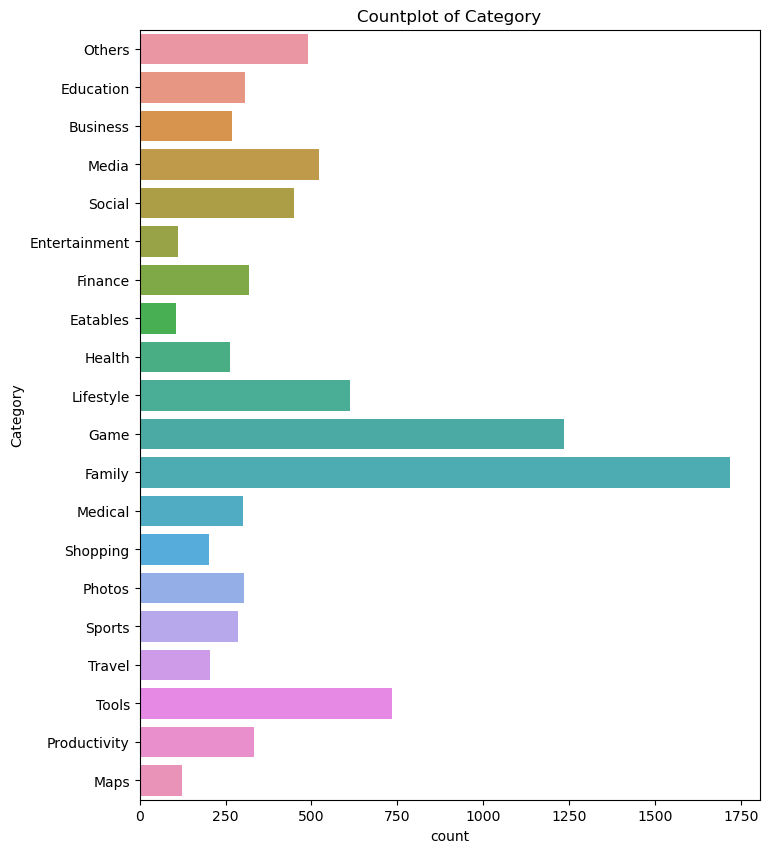

In [33]:
plt.figure(figsize=(8,10))
sns.countplot(y='Category',data=df)
plt.title('Countplot of Category')

<Axes: xlabel='Rating', ylabel='Category'>

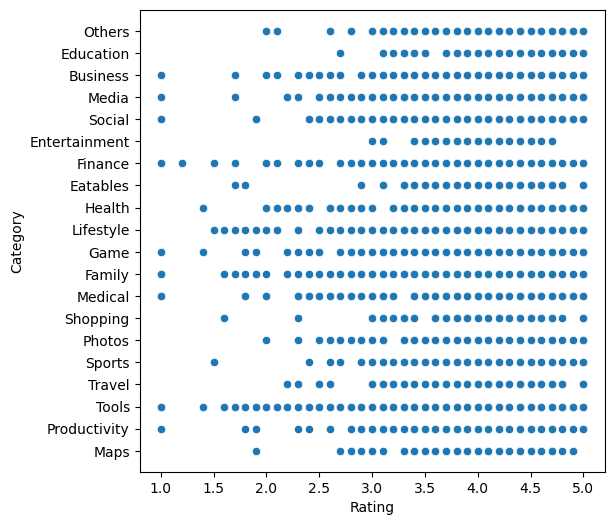

In [34]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,y='Category',x='Rating')

In [35]:
df['Reviews'].dtypes

dtype('O')

In [36]:
# Convert Reviews into int

df['Reviews'] = df['Reviews'].apply(lambda x: int(x))
df['Reviews'].dtypes

dtype('int64')

C:\Users\shrut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Reviews', ylabel='Density'>

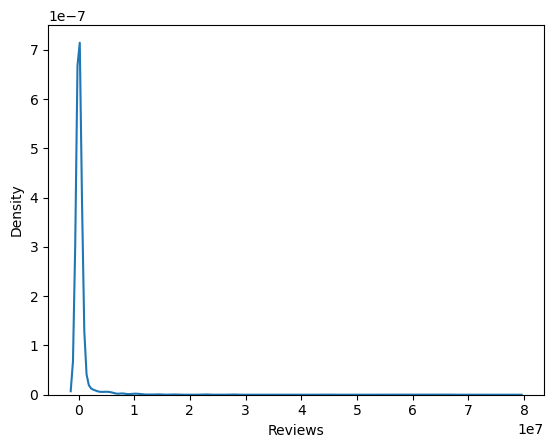

In [37]:
sns.kdeplot(df['Reviews'])

<Axes: xlabel='Reviews', ylabel='Rating'>

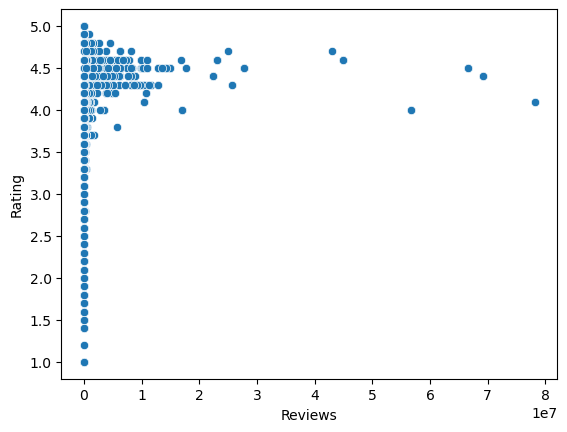

In [38]:
sns.scatterplot(data=df,x='Reviews',y='Rating')

Rating more, Reviews more

In [40]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [41]:
# Remove the non-int characters and then covert them into float

def to_numeric(value):
    if 'M' in value:
        return int(float(value.replace('M',''))*1e6)
    elif 'k' in value:
        return int(float(value.replace('k',''))*1e3)
    elif value=='Varies with device':
        return np.nan
    else:
        return int(value)
df['Size']=df['Size'].apply(to_numeric)

In [42]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [43]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1468
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [44]:
# Fill the missing values in Size by the mean of their category

df['Size'].fillna(df.groupby('Category')['Size'].transform('mean'),inplace = True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [45]:
df['Size'].dtype

dtype('float64')

In [46]:
df['Size'].describe()

count    8.886000e+03
mean     2.238603e+07
std      2.176978e+07
min      8.500000e+03
25%      6.300000e+06
50%      1.600000e+07
75%      2.975132e+07
max      1.000000e+08
Name: Size, dtype: float64

C:\Users\shrut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Size', ylabel='Density'>

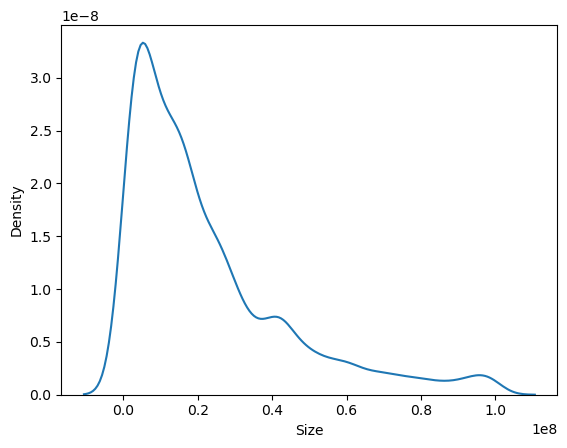

In [47]:
sns.kdeplot(df['Size'])

<Axes: xlabel='Size', ylabel='Rating'>

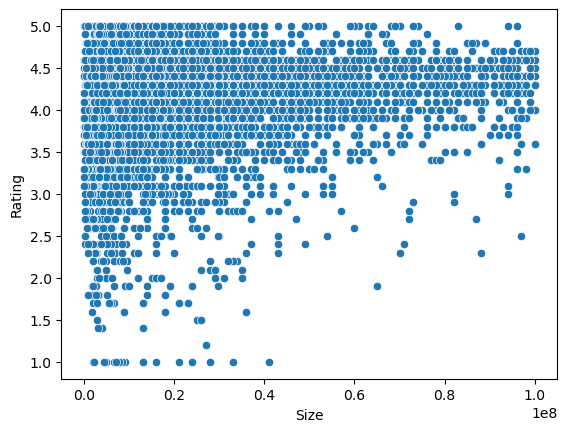

In [48]:
sns.scatterplot(x=df['Size'],y=df['Rating'])

In [49]:
print(df['Installs'].nunique())
df['Installs'].unique()

19


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

<Axes: xlabel='count', ylabel='Installs'>

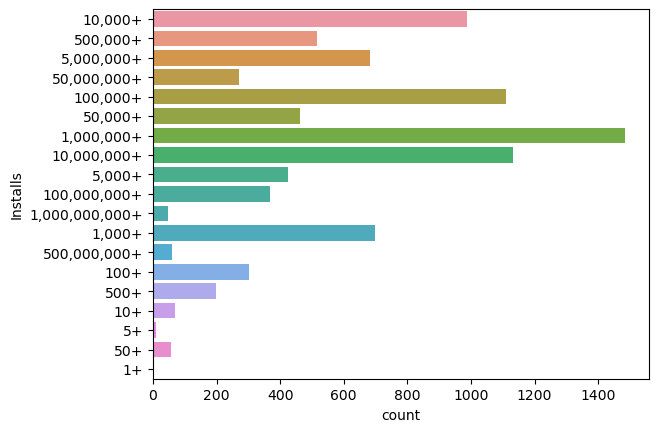

In [50]:
sns.countplot(data=df,y='Installs')

In [52]:
df['Installs'].dtype

dtype('O')

In [53]:
# Convert them into int

def remove_chars(value):
    return value.replace('+','').replace(',','')
    
df['Installs']=df['Installs'].apply(remove_chars).astype(int)

In [54]:
# To do now is manual label encoding by arranging the unique installs and alloting them numbers

uniques_installs=df['Installs'].unique()
uniques_installs=list(uniques_installs)
uniques_installs.sort()

In [55]:
df['Installs_labelled']=df['Installs'].replace(uniques_installs,range(0,len(uniques_installs),1))

In [56]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_labelled
0,Photo Editor & Candy Camera & Grid & ScrapBook,Others,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,8
1,Coloring book moana,Others,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,11
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Others,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,13
3,Sketch - Draw & Paint,Others,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,15
4,Pixel Draw - Number Art Coloring Book,Others,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,10


<Axes: xlabel='Installs_labelled', ylabel='Rating'>

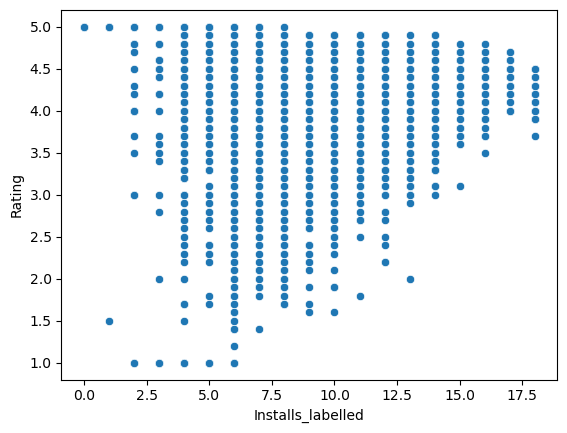

In [57]:
sns.scatterplot(y=df['Rating'],x=df['Installs_labelled'])

In [58]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [59]:
df['Type'].value_counts()

Type
Free    8275
Paid     611
Name: count, dtype: int64

In [63]:
df=pd.get_dummies(df, columns=['Type'], drop_first=True)

KeyError: "None of [Index(['Type'], dtype='object')] are in the [columns]"

In [68]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_labelled,Type_Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,Others,4.1,159,19000000.0,10000,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,8,0
1,Coloring book moana,Others,3.9,967,14000000.0,500000,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,11,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Others,4.7,87510,8700000.0,5000000,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,13,0
3,Sketch - Draw & Paint,Others,4.5,215644,25000000.0,50000000,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,15,0
4,Pixel Draw - Number Art Coloring Book,Others,4.3,967,2800000.0,100000,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,10,0


In [65]:
df['Type_Paid'].value_counts()  
# 0 --> Free
# 1 --> Paid

Type_Paid
False    8275
True      611
Name: count, dtype: int64

In [66]:
df['Type_Paid']=df['Type_Paid'].astype('int64')

In [67]:
df.dtypes

App                   object
Category              object
Rating               float64
Reviews                int64
Size                 float64
Installs               int32
Price                 object
Content Rating        object
Genres                object
Last Updated          object
Current Ver           object
Android Ver           object
Installs_labelled      int32
Type_Paid              int64
dtype: object

In [66]:
df['Rating'].corr(df['Type_Paid'])

0.03835823629568576

In [69]:
print(df['Price'].unique())
print(df['Price'].nunique())

['0' '$4.99' '$3.99' '$6.99' '$7.99' '$5.99' '$2.99' '$3.49' '$1.99'
 '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99' '$11.99'
 '$79.99' '$16.99' '$14.99' '$29.99' '$12.99' '$2.49' '$10.99' '$1.50'
 '$19.99' '$15.99' '$33.99' '$39.99' '$3.95' '$4.49' '$1.70' '$8.99'
 '$1.49' '$3.88' '$399.99' '$17.99' '$400.00' '$3.02' '$1.76' '$4.84'
 '$4.77' '$1.61' '$2.50' '$1.59' '$6.49' '$1.29' '$299.99' '$379.99'
 '$37.99' '$18.99' '$389.99' '$8.49' '$1.75' '$14.00' '$2.00' '$3.08'
 '$2.59' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04' '$13.99' '$4.29'
 '$3.28' '$4.60' '$1.00' '$2.95' '$2.90' '$1.97' '$2.56' '$1.20']
73


In [70]:
df['Price']=df['Price'].apply(lambda x: x.replace('$',''))
df['Price']=df['Price'].apply(lambda x: float(x))

In [71]:
df['Price'].dtypes

dtype('float64')

In [72]:
print(df['Price'].unique())
print(df['Price'].nunique())

[  0.     4.99   3.99   6.99   7.99   5.99   2.99   3.49   1.99   9.99
   7.49   0.99   9.     5.49  10.    24.99  11.99  79.99  16.99  14.99
  29.99  12.99   2.49  10.99   1.5   19.99  15.99  33.99  39.99   3.95
   4.49   1.7    8.99   1.49   3.88 399.99  17.99 400.     3.02   1.76
   4.84   4.77   1.61   2.5    1.59   6.49   1.29 299.99 379.99  37.99
  18.99 389.99   8.49   1.75  14.     2.     3.08   2.59  19.4    3.9
   4.59  15.46   3.04  13.99   4.29   3.28   4.6    1.     2.95   2.9
   1.97   2.56   1.2 ]
73


In [73]:
df['Price'].describe()

count    8886.000000
mean        0.963526
std        16.194792
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [74]:
df['Rating'].corr(df['Price'])

-0.022371131277972824

In [75]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_labelled,Type_Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,Others,4.1,159,19000000.0,10000,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,8,0
1,Coloring book moana,Others,3.9,967,14000000.0,500000,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,11,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Others,4.7,87510,8700000.0,5000000,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,13,0
3,Sketch - Draw & Paint,Others,4.5,215644,25000000.0,50000000,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,15,0
4,Pixel Draw - Number Art Coloring Book,Others,4.3,967,2800000.0,100000,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,10,0


In [76]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [77]:
df['Content Rating'].value_counts()

Content Rating
Everyone           7089
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [78]:
rename_content_rating= {
                        'Unrated':'Everyone',
                        'Adults only 18+': 'Adult',
                        'Mature 17+': 'Adult',
                        'Everyone 10+': 'PreTeen'
                        }

In [79]:
df['Content Rating']=df['Content Rating'].replace(rename_content_rating)

In [80]:
df['Content Rating'].value_counts()

Content Rating
Everyone    7090
Teen        1022
Adult        414
PreTeen      360
Name: count, dtype: int64

<Axes: xlabel='Content Rating', ylabel='Rating'>

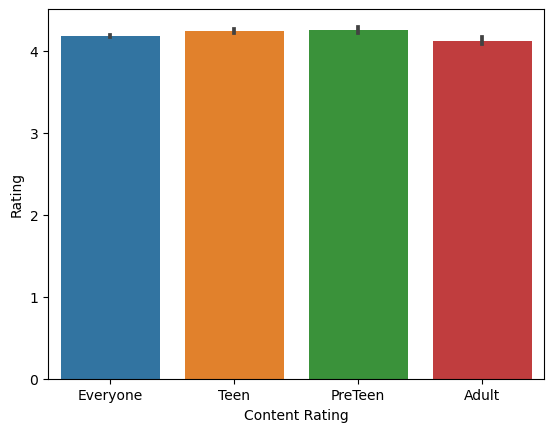

In [81]:
sns.barplot(x=df['Content Rating'],y=df['Rating'])

In [82]:
# Extracting the year from Last updated column

df['Last Update Year']=df['Last Updated'].str.split(',').str[1]
df['Last Update Year']=df['Last Update Year'].astype('int')
df['Last Update Year'].unique()

array([2018, 2017, 2014, 2016, 2015, 2013, 2012, 2011, 2010])

<Axes: xlabel='Last Update Year', ylabel='Rating'>

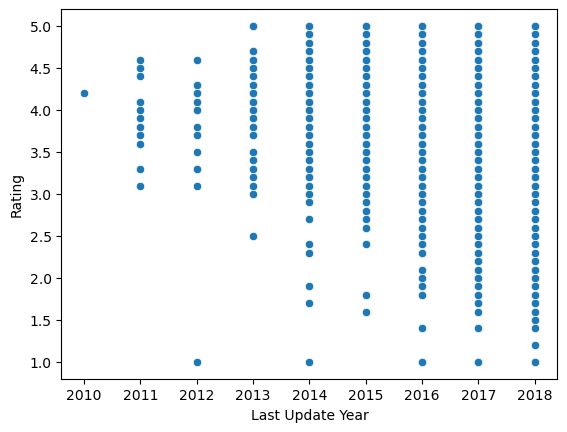

In [83]:
sns.scatterplot(x=df['Last Update Year'],y=df['Rating'])

In [85]:
# Manual babel encoding just like Installs

uniques_year=df['Last Update Year'].unique()
uniques_year=list(uniques_year)
uniques_year.sort()

In [86]:
df['Year Updt Labelled']=df['Last Update Year'].replace(uniques_year,range(0,len(uniques_year),1))

In [87]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_labelled,Type_Paid,Last Update Year,Year Updt Labelled
5094,AG Subway Simulator Mobile,Family,4.5,623,4.700000e+07,5000,0.99,Everyone,Simulation,"June 2, 2018",1.3.0.6,4.1 and up,7,1,2018,8
3845,"Truck Car Navi by Navitime Large size car, tra...",Maps,4.2,3682,1.744884e+07,100000,0.00,Everyone,Maps & Navigation,"August 2, 2018",Varies with device,Varies with device,10,0,2018,8
3919,Real City Car Driver,Game,3.7,413609,2.200000e+07,10000000,0.00,Adult,Racing,"August 1, 2018",2.8,4.1 and up,14,0,2018,8
7349,search.ch,Travel,4.4,11514,2.200000e+06,500000,0.00,Everyone,Travel & Local,"March 29, 2018",5.5,4.0 and up,11,0,2018,8
5578,Sleep as Android Unlock,Lifestyle,4.5,23966,8.720000e+05,1000000,5.99,Everyone,Lifestyle,"June 27, 2018",20180608,4.0 and up,12,1,2018,8


In [88]:
df['Current Ver'].unique()
df['Current Ver'].value_counts()

Current Ver
Varies with device    1258
1.0                    451
1.1                    190
1.2                    126
2.0                    117
                      ... 
0.1.187945513            1
68.0.3440.91             1
4.8.2.2195               1
2.32                     1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [89]:
df['major Ver']=df['Current Ver'].str.split('.').str[0]
df['major Ver'].unique()

array(['1', '2', 'Varies with device', '6', '3', '5', '4', '11', '0', '8',
       '10', '18', '9', '15', '14', '7', '99', '12', '37', '24', '47',
       'R6', '69', '42', '196', '2018', '20', '13', 'v1', '01', '43',
       '16', 'Cannonau 3', 'p5', '112', 'Public', '220', '858', 'v3',
       'Version:6', '02', '3196', '5423', '19', '1_39_93', '79', '108',
       '57', '60', '149', '37893', '20180609', '28', '25', '300000', 'PN',
       'T4', '50', '27', '29', '584', '22', '71', '1004', '06', '2017',
       '17', '53', 'v5', 'MyMetro_HTML_2', 'v8', 'v7', '32', '20180517',
       'v150', '40', '68', 'FreeTimeApp-aosp_v3',
       'Natalia Studio Development', '30', '116', '04', '27500000',
       'version 0', '5055', 'a', '31', '1009001', '1900001', 'v8[1', '23',
       '1805', '1,01', 'v2018', 'H7SubTV0', 'v2', '263', '65',
       'acremotecontrol18', 'v67_slk3',
       'airConditionerMaintenance_13112015', '11;11',
       'acremotecontrol-v7', 'v4', '117', 'cli-6', 'Version 1', '132',
 

In [90]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_labelled,Type_Paid,Last Update Year,Year Updt Labelled,major Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Others,4.1,159,19000000.0,10000,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,8,0,2018,8,1
1,Coloring book moana,Others,3.9,967,14000000.0,500000,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,11,0,2018,8,2
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Others,4.7,87510,8700000.0,5000000,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,13,0,2018,8,1
3,Sketch - Draw & Paint,Others,4.5,215644,25000000.0,50000000,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,15,0,2018,8,Varies with device
4,Pixel Draw - Number Art Coloring Book,Others,4.3,967,2800000.0,100000,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,10,0,2018,8,1


### Data Preparation

In [91]:
dff=df.drop(columns=['App','Installs','Price','Content Rating','Genres','Last Updated','Current Ver','Android Ver',
                     'Last Update Year','major Ver',])

In [92]:
dff.head()

,Category,Rating,Reviews,Size,Installs_labelled,Type_Paid,Year Updt Labelled
0,Others,4.1,159,19000000.0,8,0,8
1,Others,3.9,967,14000000.0,11,0,8
2,Others,4.7,87510,8700000.0,13,0,8
3,Others,4.5,215644,25000000.0,15,0,8
4,Others,4.3,967,2800000.0,10,0,8


In [93]:
dff.dtypes

Category               object
Rating                float64
Reviews                 int64
Size                  float64
Installs_labelled       int32
Type_Paid               int64
Year Updt Labelled      int32
dtype: object

In [94]:
dff=pd.get_dummies(dff, columns=['Category'], drop_first=True,dtype='int32')

In [95]:
dff.head()

,Rating,Reviews,Size,Installs_labelled,Type_Paid,Year Updt Labelled,Category_Eatables,Category_Education,Category_Entertainment,Category_Family,...,Category_Media,Category_Medical,Category_Others,Category_Photos,Category_Productivity,Category_Shopping,Category_Social,Category_Sports,Category_Tools,Category_Travel
0,4.1,159,19000000.0,8,0,8,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,3.9,967,14000000.0,11,0,8,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,4.7,87510,8700000.0,13,0,8,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4.5,215644,25000000.0,15,0,8,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4.3,967,2800000.0,10,0,8,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


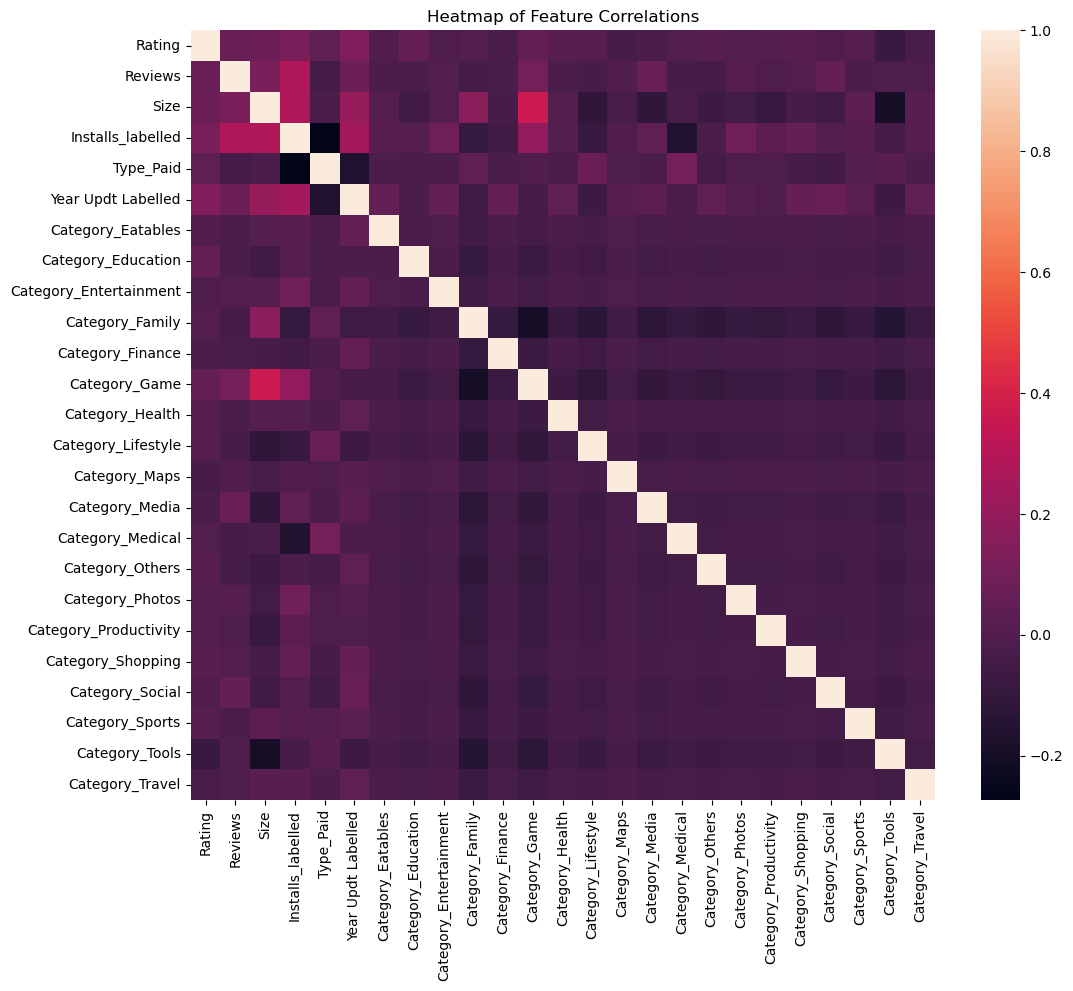

In [96]:
corr_matrix = dff.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()

In [97]:
X=dff.drop(columns=['Rating'])
y=dff['Rating']

C:\Users\shrut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rating', ylabel='Density'>

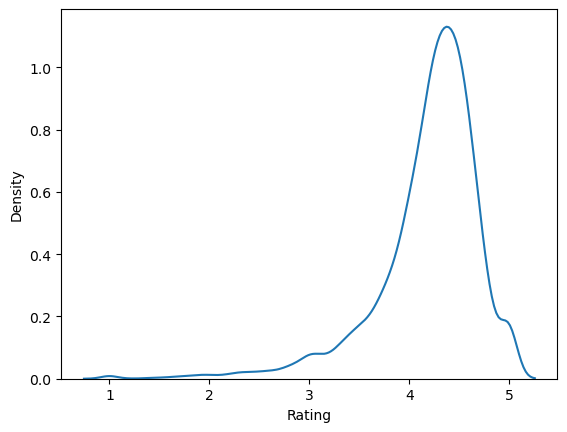

In [98]:
sns.kdeplot(y)

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.2)

In [100]:
# Normalize Reviews and size cols from X and Rating

scaler_x=StandardScaler()
scaler_y=StandardScaler()

cols_to_normalise=['Reviews','Size']

X_train[cols_to_normalise]=scaler_x.fit_transform(X_train[cols_to_normalise])
X_test[cols_to_normalise]=scaler_x.transform(X_test[cols_to_normalise])

y_train=scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test=scaler_y.transform(y_test.values.reshape(-1, 1))

In [101]:
X_train.head()

,Reviews,Size,Installs_labelled,Type_Paid,Year Updt Labelled,Category_Eatables,Category_Education,Category_Entertainment,Category_Family,Category_Finance,...,Category_Media,Category_Medical,Category_Others,Category_Photos,Category_Productivity,Category_Shopping,Category_Social,Category_Sports,Category_Tools,Category_Travel
3142,-0.012658,0.128944,14,0,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9774,-0.169262,1.733656,10,0,8,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4344,0.037446,1.089402,14,0,8,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5527,-0.049374,0.341669,13,0,8,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7743,-0.169286,-0.337159,8,0,8,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
X_train.shape

(7108, 24)

## Linear Regression

In [104]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [105]:
lr_pred=reg.predict(X_test)
lr_acc=(lr_pred,y_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))
print('R2 Score:', metrics.r2_score(y_test, lr_pred))

Mean Absolute Error: 0.6713080817047816
Mean Squared Error: 0.9090590002046695
Root Mean Squared Error: 0.9534458559376455
R2 Score: 0.03987481245270608


## Polynomial Regression

In [110]:
poly=PolynomialFeatures(degree=2)
X_poly_train=poly.fit_transform(X_train)
X_poly_test=poly.fit_transform(X_test)

In [111]:
polyreg=LinearRegression()

polyreg.fit(X_train,y_train)

poly_lr_pred=polyreg.predict(X_test)

ploy_lr_acc=(poly_lr_pred,y_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, poly_lr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, poly_lr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, poly_lr_pred)))
print('R2 Score:', metrics.r2_score(y_test, poly_lr_pred))

Mean Absolute Error: 0.6713080817047816
Mean Squared Error: 0.9090590002046695
Root Mean Squared Error: 0.9534458559376455
R2 Score: 0.03987481245270608


## Ridge Regression 

In [118]:
ridge = Ridge()
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
print('Ridge MSE:', mean_squared_error(y_test, ridge_pred))
print('Ridge R2 Score:', r2_score(y_test, ridge_pred))

Ridge MSE: 0.909060212864415
Ridge R2 Score: 0.03987353167206875


## Lasso Regression 

In [119]:
lasso = Lasso(alpha=0.01)  # Adjust alpha for regularization strength
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print('Lasso MSE:', mean_squared_error(y_test, lasso_pred))
print('Lasso R2 Score:', r2_score(y_test, lasso_pred))

Lasso MSE: 0.9143039519239835
Lasso R2 Score: 0.03433522673599332


In [120]:
# Fit Lasso Regression
lasso = Lasso(alpha=0.005)  # Adjust alpha for regularization strength
lasso.fit(X_train, y_train)

# Predict and evaluate
lasso_pred = lasso.predict(X_test)
print('Lasso MSE:', mean_squared_error(y_test, lasso_pred))
print('Lasso R2 Score:', r2_score(y_test, lasso_pred))

Lasso MSE: 0.9096796485941705
Lasso R2 Score: 0.03921929927783352


## ElasticNet Regression 

In [126]:
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)  # l1_ratio balances L1 and L2
elastic.fit(X_train, y_train)
elastic_pred = elastic.predict(X_test)

print('ElasticNet MSE:', mean_squared_error(y_test, elastic_pred))
print('ElasticNet R2 Score:', r2_score(y_test, elastic_pred))

ElasticNet MSE: 0.9101444897919978
ElasticNet R2 Score: 0.03872834572900652


## Decision Tree

In [110]:


dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dt_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dt_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))
print('R2 Score:', metrics.r2_score(y_test, dt_pred))

Mean Absolute Error: 0.7841933660444463
Mean Squared Error: 1.4368925420382381
Root Mean Squared Error: 1.1987045265778544
R2 Score: -0.5176096613081913


## Random Forest 

In [113]:


rf=RandomForestRegressor()
rf.fit(X_train,y_train.ravel())
rf_pred = rf.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print('R2 Score:', metrics.r2_score(y_test, rf_pred))

Mean Absolute Error: 0.6264091033946578
Mean Squared Error: 0.8727816151806241
Root Mean Squared Error: 0.934227817601587
R2 Score: 0.07819007151960378


Better than Decision tree but the performance is still poor.</br> This can be due to: </br>
1. Outliers in the data</br>
2. Important predictive features are missing

In [115]:


svr=SVR()

svr.fit(X_train,y_train.ravel())
svr_pred=svr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, svr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, svr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print('R2 Score:', metrics.r2_score(y_test, svr_pred))

Mean Absolute Error: 0.6244102294836357
Mean Squared Error: 0.9193733828442495
Root Mean Squared Error: 0.9588396022506838
R2 Score: 0.028981021660214323


## XG Boost 

In [117]:


xg=xgb.XGBRegressor()

xg.fit(X_train,y_train)
xgb_pred=xg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, xgb_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, xgb_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))
print('R2 Score:', metrics.r2_score(y_test, xgb_pred))

Mean Absolute Error: 0.6385624753634567
Mean Squared Error: 0.8978164717584397
Root Mean Squared Error: 0.9475317787591294
R2 Score: 0.051748887436301017


In [120]:

xgbr = XGBRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'max_depth': [3,5],
    'min_child_weight': [1, 3],
#     'gamma': [0, 0.1, 0.5, 1, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [100, 300, 500],
    'reg_lambda': [0, 1, 5],
    'reg_alpha': [0, 1, 5]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgbr, param_distributions=param_grid,
                                   n_iter=2, scoring='neg_mean_squared_error', 
                                   cv=2, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)  # MSE

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best Parameters: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 5, 'min_child_weight': 3, 'max_depth': 5, 'colsample_bytree': 0.5}
Best Score: 0.9081280587427351


In [123]:
best_xgb = random_search.best_estimator_

# Predictions
xgbr_pred = best_xgb.predict(X_test)

# Evaluate

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, xgbr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, xgbr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, xgbr_pred)))
print('R2 Score:', metrics.r2_score(y_test, xgbr_pred))

Mean Absolute Error: 0.6215578264723867
Mean Squared Error: 0.8446157215518462
Root Mean Squared Error: 0.9190297718528199
R2 Score: 0.1079381779644869
